# **Imports**

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import graphviz
import os
import glob
from google.colab import drive
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.preprocessing import LabelEncoder


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



# **Extracting Combined Dataset**

In [2]:
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set the directory path
main_dir = "/content/drive/My Drive/Capstone_Organized_Data/NewerData_Final"

# Verify if the directory exists
print("Directory exists:", os.path.exists(main_dir))
!cd "/content/drive/My Drive/Capstone_Organized_Data" && ls

# List all CSV files in the directory
csv_files = [file for file in os.listdir(main_dir) if file.endswith(".csv")]

# Define the column names
column_names = ["reading", "voltage", "LED_temp", "photo_temp", "mode", "concentration"]

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate over each CSV file
for file in csv_files:
    file_path = os.path.join(main_dir, file)

    # Read CSV while skipping the first row
    df = pd.read_csv(file_path, skiprows=1, header=None)  # Skip the header row

    # Assign new column names
    df.columns = column_names

    # Append to the list
    dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)
print("\n")

# Display the first 5 rows
print("New Combined Dataframe")
print("First 5 rows:")
print(combined_df.head())
print("\n")

# Print verification details
print(f"Number of rows: {combined_df.shape[0]}")
print(f"Number of columns: {combined_df.shape[1]}")
print(f"Number of 1200 rows: {combined_df[combined_df['mode'] == '1200'].shape[0]}")
print(f"Number of 1550 rows: {combined_df[combined_df['mode'] == '1550'].shape[0]}")
print(f"Number of both rows: {combined_df[combined_df['mode'] == 'both'].shape[0]}")
print(f"Number of none rows: {combined_df[combined_df['mode'] == 'none'].shape[0]}")
print(f"Number of 0% concentration rows: {combined_df[combined_df['concentration'] == 0].shape[0]}")
print(f"Number of 5% concentration rows: {combined_df[combined_df['concentration'] == 5].shape[0]}")
print(f"Number of 10% concentration rows: {combined_df[combined_df['concentration'] == 10].shape[0]}")
print(f"Number of 15% concentration rows: {combined_df[combined_df['concentration'] == 15].shape[0]}")
print(f"Number of 20% concentration rows: {combined_df[combined_df['concentration'] == 20].shape[0]}")
print(f"Number of 25% concentration rows: {combined_df[combined_df['concentration'] == 25].shape[0]}")
print(f"Number of 30% concentration rows: {combined_df[combined_df['concentration'] == 30].shape[0]}")
print(f"Number of 35% concentration rows: {combined_df[combined_df['concentration'] == 35].shape[0]}")
print(f"Number of 40% concentration rows: {combined_df[combined_df['concentration'] == 40].shape[0]}")
print(f"Number of 45% concentration rows: {combined_df[combined_df['concentration'] == 45].shape[0]}")
print(f"Number of 50% concentration rows: {combined_df[combined_df['concentration'] == 50].shape[0]}")
print(f"Number of 100% concentration rows: {combined_df[combined_df['concentration'] == 100].shape[0]}")
print("\n")

# Convert mode column to string (in case it's read as numeric)
combined_df["mode"] = combined_df["mode"].astype(str)

# Separate data based on mode values
modes = ["none","1550", "1200", "both"]

for mode_value in modes:
    print(f"\nStatistical Analysis for Mode {mode_value}:")
    mode_df = combined_df[combined_df["mode"] == mode_value]

    if mode_df.empty:
        print(f"No data found for mode {mode_value}")
    else:
        print(mode_df.describe())

# Overall statistics
print("\nOverall Basic Statistical Analysis:")
print(combined_df.describe())



Mounted at /content/drive
Directory exists: True
Capstone_Data_Collection.xlsx	       Final_FNN_model.ipynb  ReferenceData_Final
Capstone_ML.ipynb		       IRLData_Final	      TrainData_Final
Copy_of_FNN_model_voltages_only.ipynb  NewerData_Final


New Combined Dataframe
First 5 rows:
    reading   voltage  LED_temp  photo_temp  mode  concentration
0  0.000000  0.061195  25.11966    24.14151  none            100
1  0.000003  0.061195  25.11966    24.14151  none            100
2  0.000005  0.068023  25.11966    24.14151  none            100
3  0.000008  0.068023  25.11966    24.14151  none            100
4  0.000010  0.068023  25.11966    24.14151  none            100


Number of rows: 1190
Number of columns: 6
Number of 1200 rows: 350
Number of 1550 rows: 350
Number of both rows: 350
Number of none rows: 140
Number of 0% concentration rows: 170
Number of 5% concentration rows: 0
Number of 10% concentration rows: 170
Number of 15% concentration rows: 0
Number of 20% concentration rows: 1

# **Checking data integrity and dropping any corrupted data**

In [3]:
# Checking data integrity and dropping any corrupted data
#column_names = ["reading", "voltage", "LED_temp", "photo_temp", "mode", "concentration"]

# Identify problematic rows
problematic_rows = combined_df[
    (combined_df["voltage"].isna()) |
    (combined_df["LED_temp"].isna()) |
    (combined_df["photo_temp"].isna()) |
    (combined_df["concentration"].isna()) |
    (combined_df["voltage"] < 0) |
    (combined_df["LED_temp"] < 0) |
    (combined_df["photo_temp"] < 0) |
    (combined_df["concentration"] < 0)
]

# Print rows with missing or problematic values
if not problematic_rows.empty:
    print("Problematic Rows Detected:")
    print(problematic_rows)
else:
    print("No problematic rows found.")

# Remove rows where mode is labeled as "none"
filtered_df = combined_df.dropna()
#missing_concentration = combined_df.loc[(combined_df['concentration'].isnull())]

No problematic rows found.


# **Looking at filtered dataset distribution**

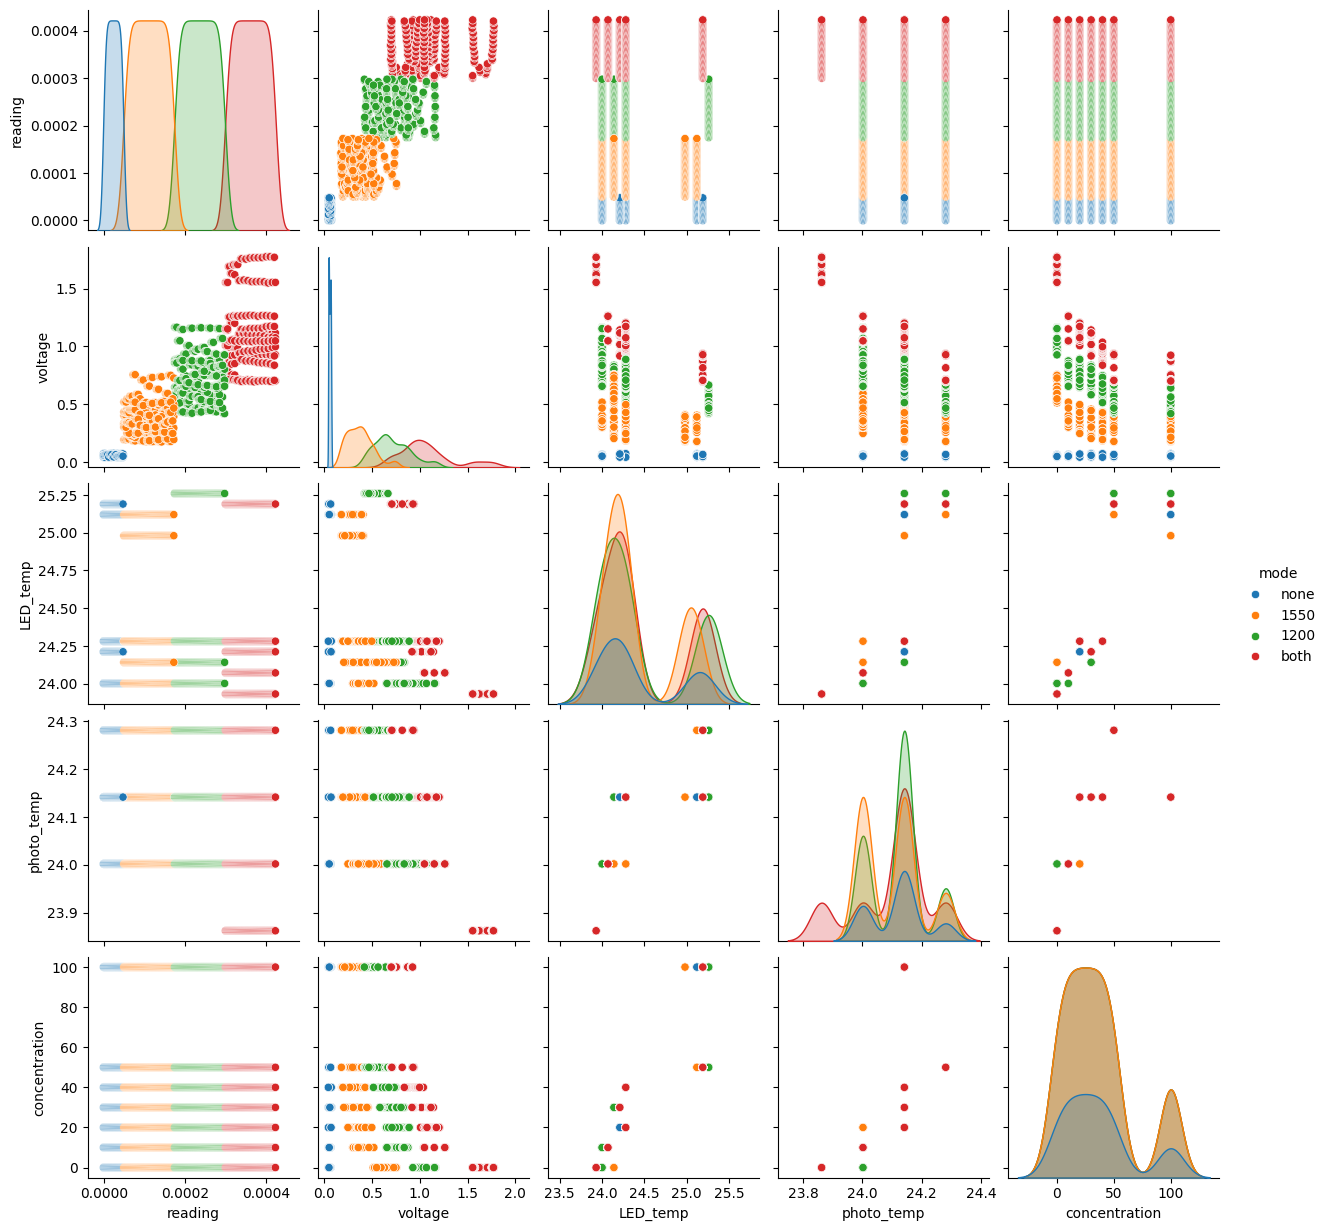

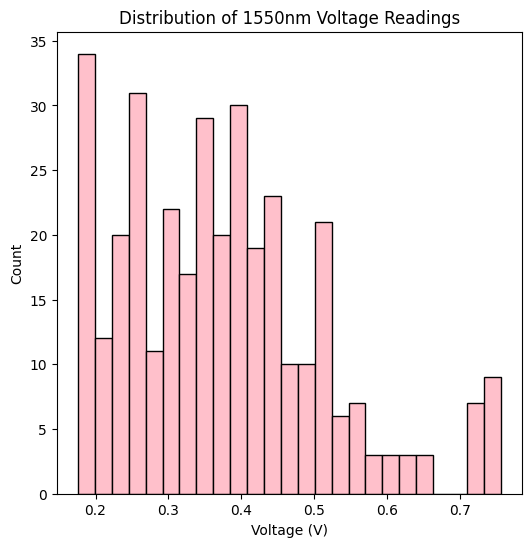

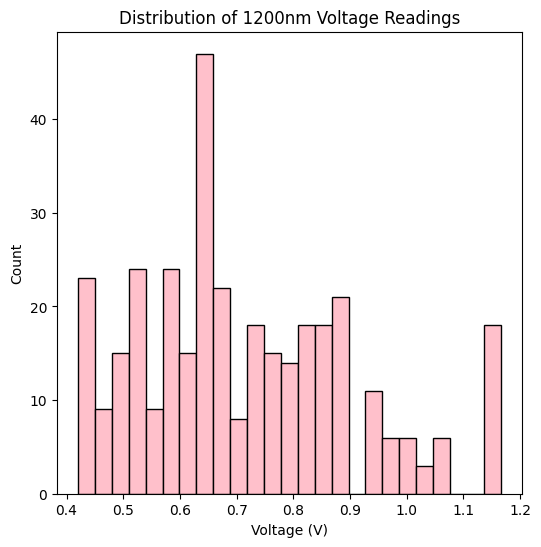

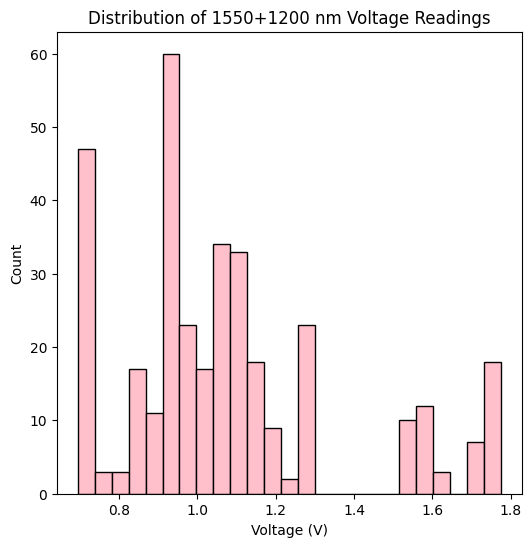

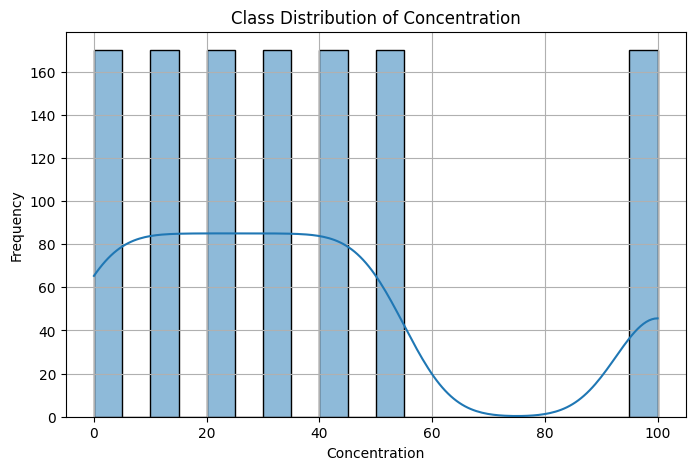

In [4]:
# Looking at data distribution
#Pair plot for all 3 modes of operation
sb.pairplot(filtered_df, hue='mode')
plt.show()

# 1550nm Voltage Variations
# Filter dataset for mode = '1550'
mode_1550_df = filtered_df[filtered_df["mode"] == "1550"]
# Extract voltage values for mode 1550
voltage_1550_ref = mode_1550_df["voltage"]
# Define variable for label
var2plot = "Voltage (V)"

# Create the histogram for mode 1550
plt.figure(figsize=(6, 6))
plt.hist(voltage_1550_ref, bins=25, color='pink', edgecolor='black')
# Add labels and title
plt.xlabel(var2plot)
plt.ylabel("Count")
plt.title("Distribution of 1550nm Voltage Readings")

# Show the plot
plt.show()



# 1200nm Voltage Variations
# Filter dataset for mode = '1200'
mode_1200_df = filtered_df[filtered_df["mode"] == "1200"]
# Extract voltage values for mode 1200
voltage_1200_ref = mode_1200_df["voltage"]
# Define variable for label
var2plot = "Voltage (V)"

# Create the histogram for mode 1200
plt.figure(figsize=(6, 6))
plt.hist(voltage_1200_ref, bins=25, color='pink', edgecolor='black')
# Add labels and title
plt.xlabel(var2plot)
plt.ylabel("Count")
plt.title("Distribution of 1200nm Voltage Readings")

# Show the plot
plt.show()





# 1550+1200 nm Voltage Variations
# Filter dataset for mode = 'both'
mode_both_df = filtered_df[filtered_df["mode"] == "both"]
# Extract voltage values for mode both
voltage_both_ref = mode_both_df["voltage"]
# Define variable for label
var2plot = "Voltage (V)"

# Create the histogram for mode both
plt.figure(figsize=(6, 6))
plt.hist(voltage_both_ref, bins=25, color='pink', edgecolor='black')
# Add labels and title
plt.xlabel(var2plot)
plt.ylabel("Count")
plt.title("Distribution of 1550+1200 nm Voltage Readings")

# Show the plot
plt.show()





# Class Distribution for Concentration
plt.figure(figsize=(8, 5))
sns.histplot(filtered_df["concentration"], bins=20, kde=True)

# Customize the plot
plt.title("Class Distribution of Concentration")
plt.xlabel("Concentration")
plt.ylabel("Frequency")
plt.grid(True)

# Show the plot
plt.show()

# **Making an average training data set for every 5 samples**

New Average DataFrame:
   concentration  mode   reading   voltage  LED_temp  photo_temp
0          100.0  none  0.000005  0.065292  25.11966    24.14151
1          100.0  none  0.000017  0.061752  25.11966    24.14151
2          100.0  none  0.000030  0.056846  25.11966    24.14151
3          100.0  none  0.000043  0.056543  25.11966    24.14151
4          100.0  1550  0.000055  0.197747  24.97998    24.14151


Number of rows: 238
Number of columns: 6
Number of 1200 rows: 70
Number of 1550 rows: 70
Number of both rows: 70
Number of none rows: 28
Number of 0% concentration rows: 34
Number of 50% concentration rows: 34
Number of 100% concentration rows: 34




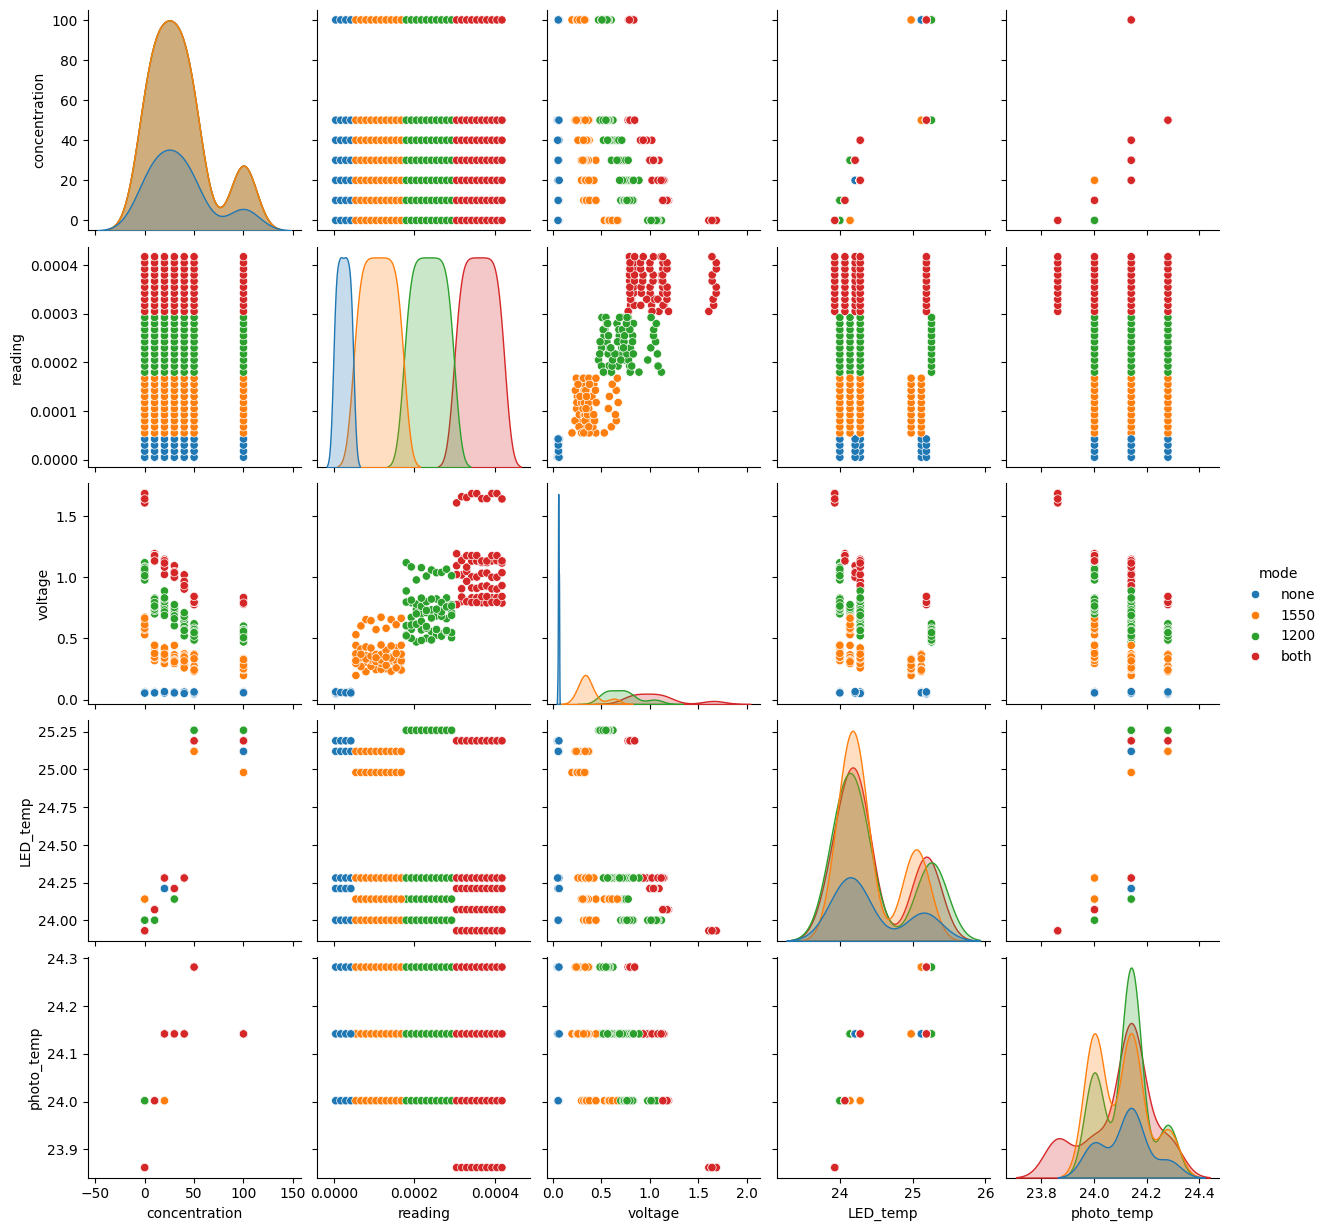

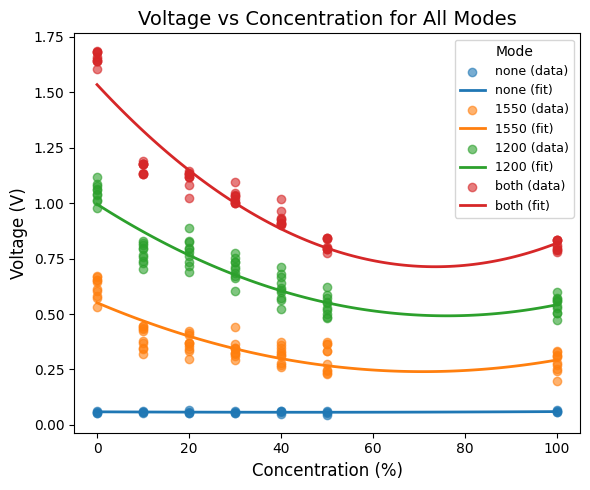

In [5]:
# Making average data frame for every 10 samples to help eliminate noise
# Define the window size for averaging
window_size = 5

# Create an empty list to store rows before converting to a DataFrame
avg_df_list = []

# Loop through unique concentrations
for concentration in filtered_df["concentration"].unique():
    # Loop through unique modes
    for mode in filtered_df["mode"].unique():
        # Filter dataset by current concentration and mode
        subset = filtered_df[(filtered_df["concentration"] == concentration) &
                             (filtered_df["mode"] == mode)]

        # Ensure there are enough rows for averaging
        if len(subset) >= window_size:
            for i in range(0, len(subset), window_size):  # Step through in blocks of 10
                chunk = subset.iloc[i:i + window_size]  # Select 10-row chunk

                # Compute the mean for numerical columns
                numeric_avg = chunk.select_dtypes(include=['number']).mean()

                # Store first values of mode and concentration
                row = {
                    "concentration": concentration,
                    "mode": mode
                }

                # Add numerical averages to the row dictionary
                row.update(numeric_avg.to_dict())

                # Append row to list
                avg_df_list.append(row)

# Convert list to DataFrame
avg_df = pd.DataFrame(avg_df_list)

# Display result
print("New Average DataFrame:")
print(avg_df.head())
print("\n")

# Print verification details
print(f"Number of rows: {avg_df.shape[0]}")
print(f"Number of columns: {avg_df.shape[1]}")
print(f"Number of 1200 rows: {avg_df[avg_df['mode'] == '1200'].shape[0]}")
print(f"Number of 1550 rows: {avg_df[avg_df['mode'] == '1550'].shape[0]}")
print(f"Number of both rows: {avg_df[avg_df['mode'] == 'both'].shape[0]}")
print(f"Number of none rows: {avg_df[avg_df['mode'] == 'none'].shape[0]}")
print(f"Number of 0% concentration rows: {avg_df[avg_df['concentration'] == 0].shape[0]}")
print(f"Number of 50% concentration rows: {avg_df[avg_df['concentration'] == 50].shape[0]}")
print(f"Number of 100% concentration rows: {avg_df[avg_df['concentration'] == 100].shape[0]}")
print("\n")

# Pair plot for all 3 modes of operation
sb.pairplot(avg_df, hue='mode')
plt.show()




# Plot voltage vs concentration for all 4 modes with best-fit curves
plt.figure(figsize=(6, 5))

# Loop through each mode and plot
for mode in avg_df["mode"].unique():
    subset = avg_df[avg_df["mode"] == mode]
    x = subset["concentration"]
    y = subset["voltage"]

    # Scatter the original data
    plt.scatter(x, y, label=f"{mode} (data)", alpha=0.6)

    # Fit a 2nd-degree polynomial and plot the curve
    if len(x) >= 3:  # Need at least 3 points to fit a 2nd-degree polynomial
        coeffs = np.polyfit(x, y, 2)
        poly_eq = np.poly1d(coeffs)
        x_range = np.linspace(min(x), max(x), 100)
        y_fit = poly_eq(x_range)
        plt.plot(x_range, y_fit, label=f"{mode} (fit)", linewidth=2)

# Labeling the plot
plt.xlabel("Concentration (%)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.title("Voltage vs Concentration for All Modes", fontsize=14)
plt.legend(title="Mode", fontsize=9, title_fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



# **Extracting bigger data set to pass into the NN**

In [6]:
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set the directory path
main_dir = "/content/drive/My Drive/Capstone_Organized_Data/TrainData_Final"

# Verify if the directory exists
print("Directory exists:", os.path.exists(main_dir))
!cd "/content/drive/My Drive/Capstone_Organized_Data" && ls

# List all CSV files in the directory
csv_files = [file for file in os.listdir(main_dir) if file.endswith(".csv")]

# Define the column names
column_names = ["reading", "voltage", "LED_temp", "photo_temp", "mode", "concentration"]

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate over each CSV file
for file in csv_files:
    file_path = os.path.join(main_dir, file)

    # Read CSV while skipping the first row
    df = pd.read_csv(file_path, skiprows=1, header=None)  # Skip the header row

    # Assign new column names
    df.columns = column_names

    # Append to the list
    dataframes.append(df)

    reordered_dataframes = []

for dataframe in dataframes:
    subframes = []
    #df_mode_none = dataframe[dataframe['mode'] == 'none']
    df_mode_1550 = dataframe[dataframe['mode'] == '1550']
    df_mode_1200 = dataframe[dataframe['mode'] == '1200']
    df_mode_both = dataframe[dataframe['mode'] == 'both']
    #subframes.append(df_mode_none)
    subframes.append(df_mode_1550)
    subframes.append(df_mode_1200)
    subframes.append(df_mode_both)
    subframes_modeified=[]
    for sf in subframes:
        mode_value = sf['mode'].iloc[0]  # Get the 'mode' value of the first row
        # Set new column names
        new_column_names = [
            f"reading", f"voltage_{mode_value}", f"LED_temp_{mode_value}",
            f"photo_temp_{mode_value}","mode",  f"concentration"
        ]
        # Rename the columns of the subframe to standardized names
        sf.columns = new_column_names

        # If the current mode is either '1550' or '1200', drop the 'concentration' column
        # This assumes that only the 'both' mode retains the ground-truth concentration label
        if mode_value == "1550" or mode_value == "1200":
            sf = sf.drop(columns=["concentration"])

        # Reset the index of the subframe to ensure alignment when concatenating later
        sf = sf.reset_index(drop=True)

        # Drop the 'mode' column as it is no longer needed after filtering
        sf = sf.drop(columns=["mode"])

        # Drop the 'reading' column since it's also not needed for the model input
        sf = sf.drop(columns=["reading"])

        # Add the cleaned and processed subframe to the list for later combination
        subframes_modeified.append(sf)

        # After processing all subframes, concatenate them horizontally (side by side)
        combined_df = pd.concat(subframes_modeified, axis=1)

        # Rename 'concentration_both' to just 'concentration' for simplicity and standardization
        df.rename(columns={'concentration_both': 'concentration'}, inplace=True)

        # Append the final, reorganized dataframe to a list for further processing or model input
        reordered_dataframes.append(combined_df)

final_df_nonavg = pd.concat(reordered_dataframes, axis=0).reset_index(drop=True)
print(final_df_nonavg.shape)
final_df = final_df_nonavg.groupby(final_df_nonavg.index // 5).mean()


Mounted at /content/drive
Directory exists: True
Capstone_Data_Collection.xlsx	       Final_FNN_model.ipynb  ReferenceData_Final
Capstone_ML.ipynb		       IRLData_Final	      TrainData_Final
Copy_of_FNN_model_voltages_only.ipynb  NewerData_Final
(3500, 10)


# **Neural Network**

In [7]:
# Extract features (X) and target (y)
from sklearn.preprocessing import MinMaxScaler
X = final_df.drop('concentration', axis=1)

scaler = MinMaxScaler()
X['photo_temp_1550'] = scaler.fit_transform(X[['photo_temp_1550']])
X['photo_temp_1200'] = scaler.fit_transform(X[['photo_temp_1200']])
X['photo_temp_both'] = scaler.fit_transform(X[['photo_temp_both']])
X['LED_temp_1550'] = scaler.fit_transform(X[['LED_temp_1550']])
X['LED_temp_1200'] = scaler.fit_transform(X[['LED_temp_1200']])
X['LED_temp_both'] = scaler.fit_transform(X[['LED_temp_both']])

print(X)

y = final_df['concentration']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

# Dataset class
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = MyDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Define the FNN model with Batch Normalization
class FNN(nn.Module):
    def __init__(self, input_size):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)  # Batch Normalization
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)  # Batch Normalization
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)  # Apply BatchNorm after FC layer
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.bn2(x)  # Apply BatchNorm after FC layer
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize the model, optimizer, and loss function
model = FNN(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Early stopping setup
patience = 10
best_val_loss = float('inf')
epochs_without_improvement = 0

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()

    # Validate
    model.eval()
    with torch.no_grad():
        val_loss = criterion(model(X_val), y_val.unsqueeze(1))
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Early stopping check
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
    if epochs_without_improvement >= patience:
        print("Early stopping triggered!")
        break

# Test evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test.unsqueeze(1))
    print(f"Test Loss: {test_loss.item():.4f}")

    # Calculate R-squared
    r2 = r2_score(y_test.numpy(), y_pred.numpy())
    print(f"R-squared: {r2:.4f}")

     voltage_1550  LED_temp_1550  photo_temp_1550  voltage_1200  \
0        0.846798       0.706294         0.727617      0.799207   
1        0.849200       0.706294         0.727617      0.796855   
2        0.854409       0.706294         0.727617      0.786993   
3        0.855067       0.706294         0.727617      0.798726   
4        0.848315       0.706294         0.727617      0.790078   
..            ...            ...              ...           ...   
695      0.818324       0.353447         0.182097      1.523462   
696      0.821106       0.353447         0.182097      1.519972   
697      0.816984       0.353447         0.182097      1.523234   
698      0.819588       0.353447         0.182097      1.520503   
699      0.818248       0.353447         0.182097      1.522552   

     LED_temp_1200  photo_temp_1200  voltage_both  LED_temp_both  \
0         0.593215         0.727617      1.646333       0.605241   
1         0.593215         0.727617      1.646283       0.6

# **Neural network results**

    Prediction  Expectation
0     4.939444          0.0
1    66.437798        100.0
2    23.478815         30.0
3     3.082296          0.0
4    23.370775         10.0
..         ...          ...
65   28.226658         20.0
66    3.657286          0.0
67   76.214760        100.0
68   67.939636        100.0
69   18.775606         10.0

[70 rows x 2 columns]


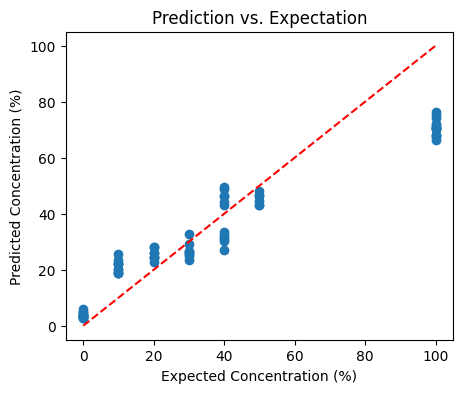

In [8]:

# Assuming y_pred and y_test are your predicted and actual values as PyTorch tensors
# Convert them to NumPy arrays for easier manipulation
y_pred_np = y_pred.numpy().flatten()
y_test_np = y_test.numpy()

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Prediction': y_pred_np, 'Expectation': y_test_np})

# Print the DataFrame
print(results_df)

# You can also plot the predictions vs. expectations
plt.figure(figsize=(5, 4))
plt.scatter(y_test_np, y_pred_np)
plt.xlabel('Expected Concentration (%)')
plt.ylabel('Predicted Concentration (%)')
plt.title('Prediction vs. Expectation')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.show()


# **Extracting IRL test dataset for final test**

In [9]:
#Extracting IRL test dataset for final test
#This file contains an example without the concentration class labeled.
#This means that the labels will have to be predicted using a neural network

# Step 1: Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Set the directory path where the CSV file is stored
irl_dir = "/content/drive/My Drive/Capstone_Organized_Data/IRLData_Final"

# Step 3: Verify if the directory exists
if os.path.exists(irl_dir):
    print("Directory exists. Listing files:")
    !ls "$irl_dir"
else:
    print("Error: The directory does not exist. Check the path.")

# Step 4: Find the CSV file in the directory
csv_files = [file for file in os.listdir(irl_dir) if file.endswith(".csv")]

if len(csv_files) == 0:
    raise FileNotFoundError("No CSV file found in the specified directory!")
elif len(csv_files) > 1:
    print(f"Warning: More than one CSV file found. Using the first file: {csv_files[0]}")

# Step 5: Define the file path
csv_file_path = os.path.join(irl_dir, csv_files[0])

# Step 6: Define column names
column_names = ["reading", "voltage", "LED_temp", "photo_temp", "mode", "concentration"]

# Step 7: Read the CSV file (skip the first row if necessary)
irl_df = pd.read_csv(csv_file_path, skiprows=1, header=None)  # Skip the blank row

# Step 8: Assign column names
irl_df.columns = column_names

# Step 9: Display the first 5 rows
print("\nLoaded DataFrame:")
print(irl_df.head())

# Step 10: Print dataset details
print("\nDataset Information:")
print(f"Total rows: {irl_df.shape[0]}")
print(f"Total columns: {irl_df.shape[1]}")

# Ensure 'mode' is a string (useful for categorization)
irl_df["mode"] = irl_df["mode"].astype(str)

# Step 11: Verify concentration distribution
print("\nConcentration Distribution:")
print(irl_df["concentration"].value_counts())

# Step 12: Display overall statistics
print("\nBasic Statistical Summary:")
print(irl_df.describe())

# Step 13 Simplifying average dataset
# Group by 'concentration' and 'mode', then compute the mean for numerical columns
irl_df_avg = irl_df.groupby(["mode"], as_index=False).mean()

# Step 12: Display overall statistics for average dataset
print("\nDisplaying irl_df_avg:")
print(irl_df_avg.head())

irl_df_t = irl_df_avg.drop('reading', axis=1)
# Delete 'none' rows
irl_df_tt = irl_df_t[irl_df_t['mode'] != 'none']




# Get unique concentrations
unique_concentrations = irl_df_tt["concentration"].unique()
num_samples_per_concentration = 1  # 5 samples per mode

# Create an empty list to store the merged rows
merged_data = []


# Extract voltage values for each mode
voltage_1550 = irl_df_tt.loc[(irl_df_tt["mode"] == "1550"), "voltage"].values[:num_samples_per_concentration]
voltage_1200 = irl_df_tt.loc[(irl_df_tt["mode"] == "1200"), "voltage"].values[:num_samples_per_concentration]
voltage_both = irl_df_tt.loc[(irl_df_tt["mode"] == "both"), "voltage"].values[:num_samples_per_concentration]


# Combine into a list of dictionaries
for i in range(num_samples_per_concentration):
    merged_data.append({
        "concentration": irl_df_tt["concentration"].iloc[0],
        "voltage_1550": voltage_1550[i] if i < len(voltage_1550) else None,
        "voltage_1200": voltage_1200[i] if i < len(voltage_1200) else None,
        "voltage_both": voltage_both[i] if i < len(voltage_both) else None
    })

# Convert to a DataFrame
df_final = pd.DataFrame(merged_data)

# Display the final DataFrame
print(df_final.head())

# Check the shape to ensure 5 rows per concentration
print(f"\nExpected rows: 1, Actual rows: {df_final.shape[0]}")




# Create an empty list to store the merged rows
merged_data3 = []


# Extract voltage values for each mode
LED_temp_1550 = irl_df_tt.loc[(irl_df_tt["mode"] == "1550"), "LED_temp"].values[:num_samples_per_concentration]
LED_temp_1200 = irl_df_tt.loc[(irl_df_tt["mode"] == "1200"), "LED_temp"].values[:num_samples_per_concentration]
LED_temp_both = irl_df_tt.loc[(irl_df_tt["mode"] == "both"), "LED_temp"].values[:num_samples_per_concentration]

# Combine into a list of dictionaries
for i in range(num_samples_per_concentration):
    merged_data3.append({
        "concentration": irl_df_tt["concentration"].iloc[0],
        "LED_temp_1550": LED_temp_1550[i] if i < len(LED_temp_1550) else None,
        "LED_temp_1200": LED_temp_1200[i] if i < len(LED_temp_1200) else None,
        "LED_temp_both": LED_temp_both[i] if i < len(LED_temp_both) else None
    })

# Convert to a DataFrame
df_final3 = pd.DataFrame(merged_data3)

# Display the final DataFrame
print(df_final3.head())

# Check the shape to ensure 5 rows per concentration
print(f"\nExpected rows: 1, Actual rows: {df_final3.shape[0]}")






# Create an empty list to store the merged rows
merged_data4 = []


# Extract voltage values for each mode
photo_temp_1550 = irl_df_tt.loc[(irl_df_tt["mode"] == "1550"), "photo_temp"].values[:num_samples_per_concentration]
photo_temp_1200 = irl_df_tt.loc[(irl_df_tt["mode"] == "1200"), "photo_temp"].values[:num_samples_per_concentration]
photo_temp_both = irl_df_tt.loc[(irl_df_tt["mode"] == "both"), "photo_temp"].values[:num_samples_per_concentration]

# Combine into a list of dictionaries
for i in range(num_samples_per_concentration):
      merged_data4.append({
        "concentration": irl_df_tt["concentration"].iloc[0],
        "photo_temp_1550": photo_temp_1550[i] if i < len(photo_temp_1550) else None,
        "photo_temp_1200": photo_temp_1200[i] if i < len(photo_temp_1200) else None,
        "photo_temp_both": photo_temp_both[i] if i < len(photo_temp_both) else None
    })

# Convert to a DataFrame
df_final4 = pd.DataFrame(merged_data4)

# Display the final DataFrame
print(df_final4.head())

# Check the shape to ensure 5 rows per concentration
print(f"\nExpected rows: 1, Actual rows: {df_final4.shape[0]}")







# Create a new DataFrame with 10 columns
irl_combined = pd.DataFrame()

# Assign concentration column from df_final
irl_combined["concentration"] = df_final["concentration"]

# Assign voltage columns
irl_combined["voltage_1550"] = df_final["voltage_1550"]
irl_combined["voltage_1200"] = df_final["voltage_1200"]
irl_combined["voltage_both"] = df_final["voltage_both"]

# Assign LED temperature columns
irl_combined["LED_temp_1550"] = df_final3["LED_temp_1550"]
irl_combined["LED_temp_1200"] = df_final3["LED_temp_1200"]
irl_combined["LED_temp_both"] = df_final3["LED_temp_both"]

# Assign photo temperature columns
irl_combined["photo_temp_1550"] = df_final4["photo_temp_1550"]
irl_combined["photo_temp_1200"] = df_final4["photo_temp_1200"]
irl_combined["photo_temp_both"] = df_final4["photo_temp_both"]

# Display the final DataFrame
print(irl_combined.head())

# Check the final DataFrame shape (should have exactly 10 columns)
print(f"\nTotal columns in the final DataFrame: {irl_combined.shape[1]}")

print(irl_combined.shape)

Mounted at /content/drive
Directory exists. Listing files:
sample2025_04_04_1152.csv

Loaded DataFrame:
    reading   voltage  LED_temp  photo_temp  mode  concentration
0  0.000000  0.049310  24.42108    24.28131  none             20
1  0.000003  0.049310  24.42108    24.28131  none             20
2  0.000005  0.055632  24.42108    24.28131  none             20
3  0.000008  0.055632  24.42108    24.28131  none             20
4  0.000010  0.055632  24.42108    24.28131  none             20

Dataset Information:
Total rows: 170
Total columns: 6

Concentration Distribution:
concentration
20    170
Name: count, dtype: int64

Basic Statistical Summary:
          reading     voltage    LED_temp    photo_temp  concentration
count  170.000000  170.000000  170.000000  1.700000e+02          170.0
mean     0.000211    1.337195   24.421080  2.428131e+01           20.0
std      0.000123    0.812581    0.107515  5.701135e-14            0.0
min      0.000000    0.045391   24.281310  2.428131e+01     

# **Performing IRL test**

   Prediction  Expectation Expected_Label
0   23.765957         20.0             20


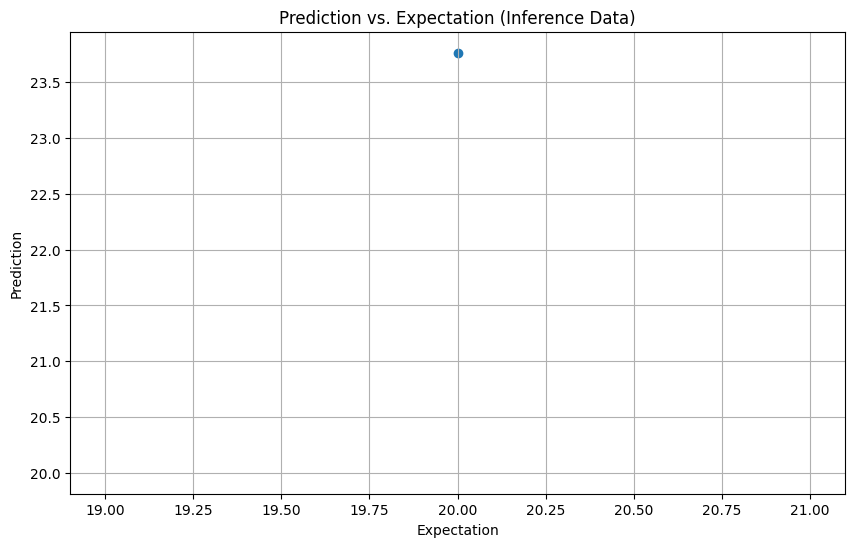

In [10]:
# Assuming inf_test_df is your DataFrame for inference
X_inf_test = irl_combined.drop('concentration', axis=1)
y_inf_test = irl_combined['concentration']

scaler = MinMaxScaler()
X_inf_test['photo_temp_1550'] = scaler.fit_transform(X_inf_test[['photo_temp_1550']])
X_inf_test['photo_temp_1200'] = scaler.fit_transform(X_inf_test[['photo_temp_1200']])
X_inf_test['photo_temp_both'] = scaler.fit_transform(X_inf_test[['photo_temp_both']])
X_inf_test['LED_temp_1550'] = scaler.fit_transform(X_inf_test[['LED_temp_1550']])
X_inf_test['LED_temp_1200'] = scaler.fit_transform(X_inf_test[['LED_temp_1200']])
X_inf_test['LED_temp_both'] = scaler.fit_transform(X_inf_test[['LED_temp_both']])

# Standardize features using the same scaler used for training
scaler = StandardScaler()
X_inf_test = scaler.fit_transform(X_inf_test)

# Convert data to PyTorch tensors
X_inf_test = torch.tensor(X_inf_test, dtype=torch.float32)
y_inf_test = torch.tensor(y_inf_test.values, dtype=torch.float32)

# Make predictions using the trained model
model.eval()
with torch.no_grad():
    y_inf_pred = model(X_inf_test)

# Convert predictions to NumPy arrays
y_inf_pred_np = y_inf_pred.numpy().flatten()
y_inf_test_np = y_inf_test.numpy()

# Create a DataFrame to store the results
inf_results_df = pd.DataFrame({
    'Prediction': y_inf_pred_np,
    'Expectation': y_inf_test_np
})

# Add a column that labels values between 50 and 100 as "50-100"
def label_expectation(value):
    if 50 <= value <= 100:
        return "50-100"
    else:
        return str(int(value))  # or keep as float if needed

inf_results_df["Expected_Label"] = inf_results_df["Expectation"].apply(label_expectation)

# Print the updated DataFrame
print(inf_results_df)

# Plot the predictions vs. expectations
plt.figure(figsize=(10, 6))
plt.scatter(y_inf_test_np, y_inf_pred_np)
plt.xlabel('Expectation')
plt.ylabel('Prediction')
plt.title('Prediction vs. Expectation (Inference Data)')
plt.plot([min(y_inf_test_np), max(y_inf_test_np)], [min(y_inf_test_np), max(y_inf_test_np)], color='red', linestyle='--')
plt.grid(True)
plt.show()